In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (40,30)
sns.set(style="whitegrid", font_scale=2)

In [71]:
wine_reviews_raw = pd.read_json('wine-reviews/winemag-data-130k-v2.json')

In [72]:
wine_reviews_raw.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [4]:
wine_reviews_raw.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
wine_reviews_raw.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', None, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [6]:
wine_reviews_raw.country.isnull().values.any()
# There are missing values for country.

True

In [7]:
wine_reviews_raw.country.isnull().values.sum()
# total missing values

63

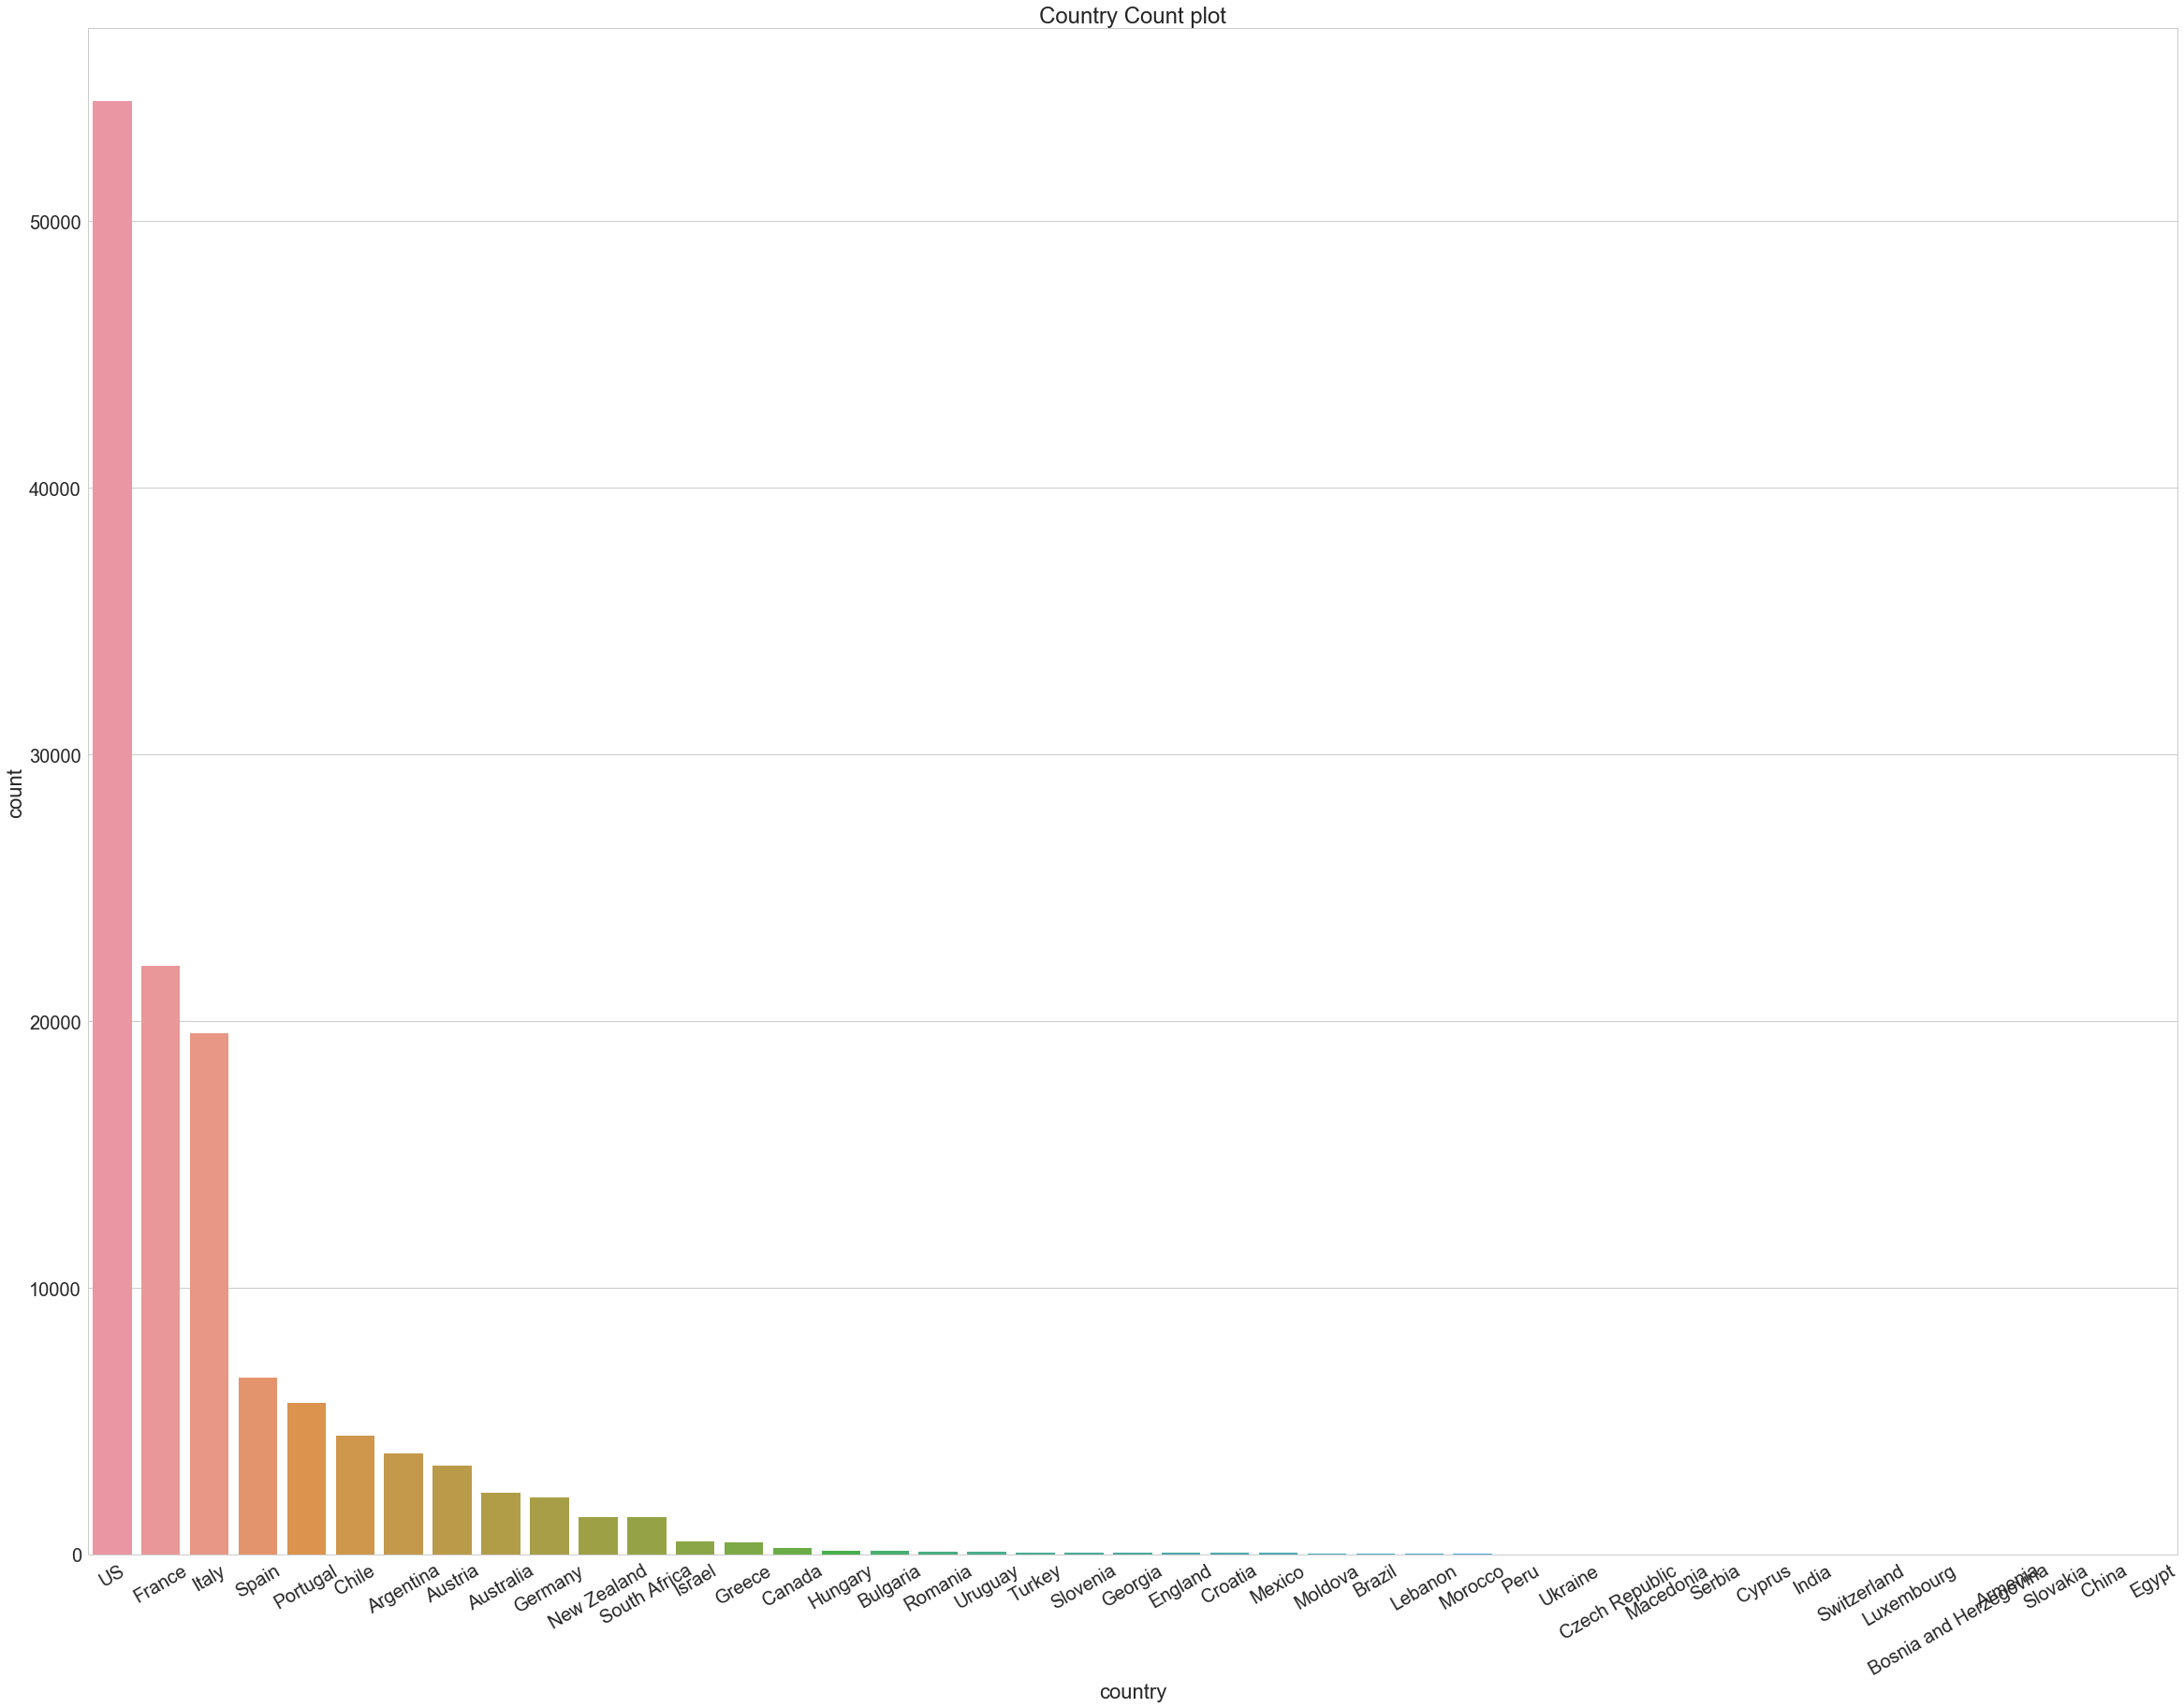

In [8]:
g = sns.countplot(data=wine_reviews_raw,
                  x='country',
                  order=wine_reviews_raw.country.value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Country Count plot')
plt.show()

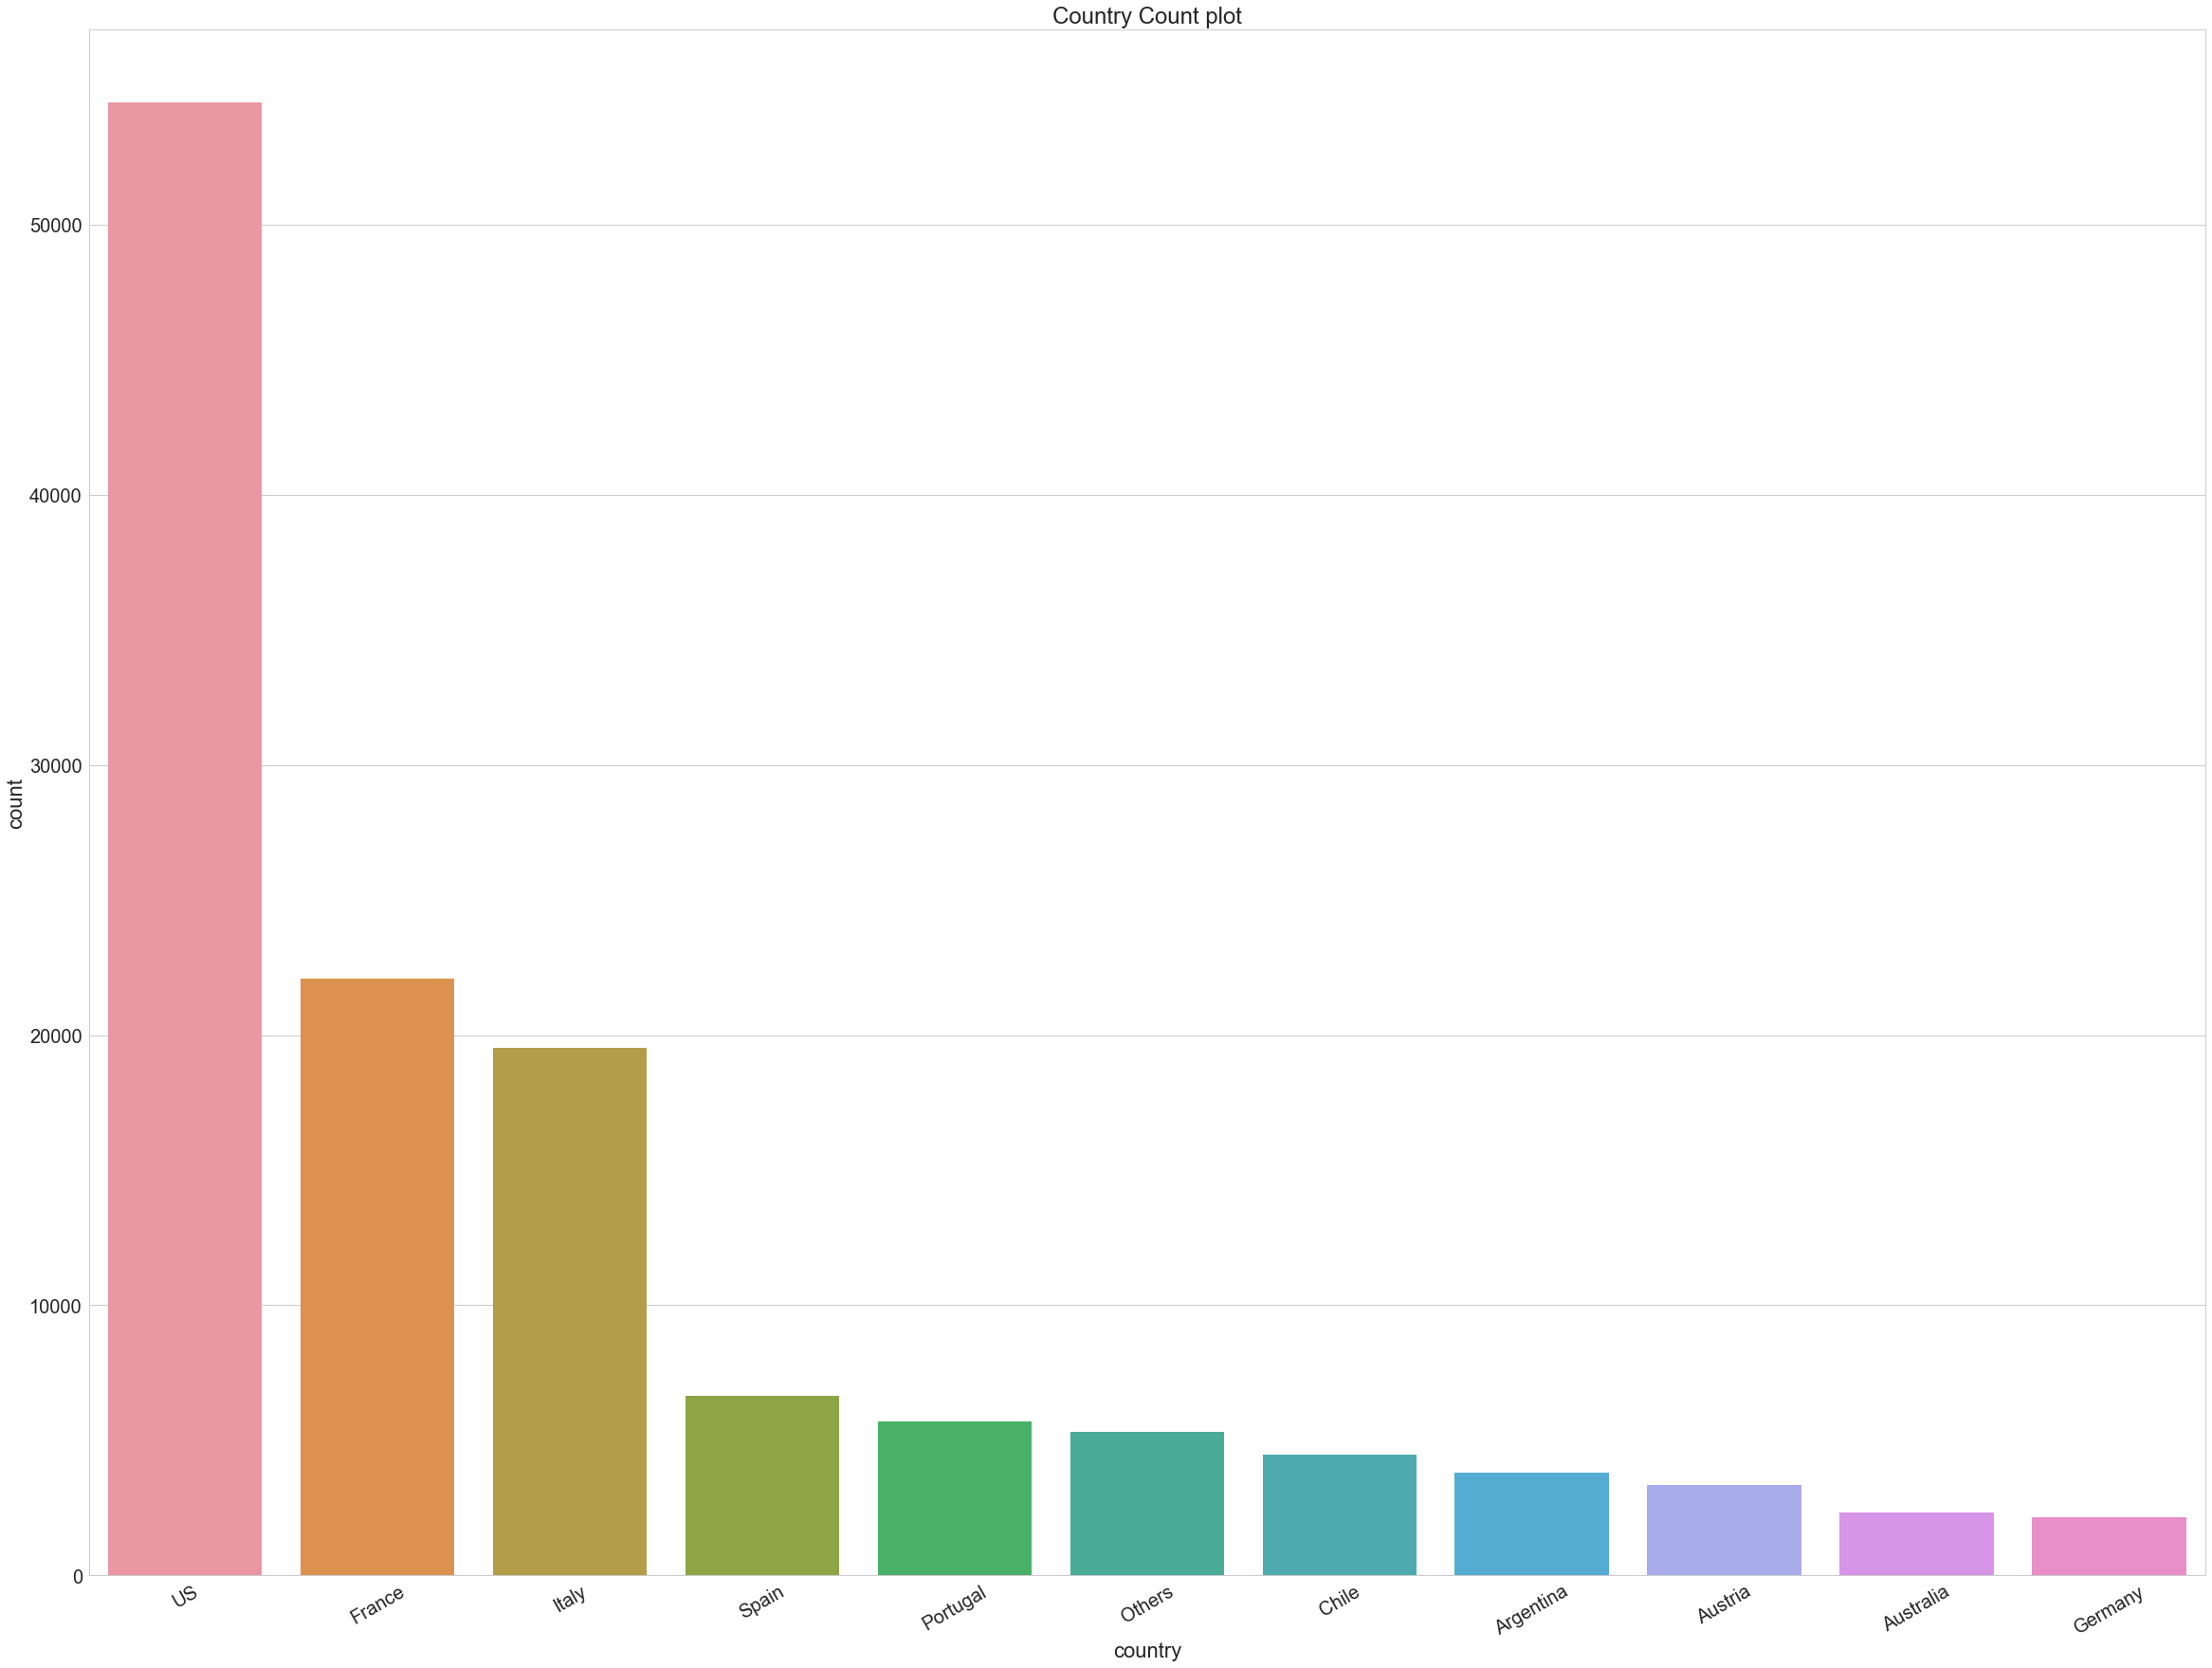

In [9]:
# Convert less frequent country-total wines as others to reduce dimentionality.

# Get list of country list with low wine production.
country_list = wine_reviews_raw.groupby('country').agg('count').description.reset_index()
low_freq_country_list = country_list[country_list.description <= 2000].country

# update all low wine variety producing country list to other to reduce dimetionality.
wine_reviews_raw.loc[wine_reviews_raw.country.isin(low_freq_country_list),'country'] = 'Others'

# view count plot after updating some with others.
g = sns.countplot(data=wine_reviews_raw,
                  x='country',
                  order=wine_reviews_raw.country.value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Country Count plot')
plt.show()


In [10]:
wine_reviews_raw.price.isnull().any()
# There are some missing price values in dataframe.

True

In [11]:
wine_reviews_raw.price.min()

4.0

In [12]:
wine_reviews_raw.price.max()

3300.0

In [13]:
len(wine_reviews_raw.variety.unique())

708

In [14]:
len(wine_reviews_raw.winery.unique())

16757

In [15]:
wine_reviews_raw.winery.value_counts()

Wines & Winemakers             222
Testarossa                     218
DFJ Vinhos                     215
Williams Selyem                211
Louis Latour                   199
Georges Duboeuf                196
Chateau Ste. Michelle          194
Concha y Toro                  164
Columbia Crest                 159
Kendall-Jackson                130
Siduri                         126
Gary Farrell                   125
Lynmar                         118
Albert Bichot                  117
Montes                         117
Undurraga                      113
Trapiche                       113
Jean-Luc and Paul Aegerter     113
Casa Santos Lima               113
Robert Mondavi                 112
Santa Ema                      112
Chanson Père et Fils           109
Fess Parker                    108
V. Sattui                      107
Iron Horse                     106
Foxen                          105
Louis Jadot                    104
Chehalem                       102
Maryhill            

In [16]:
len(wine_reviews_raw.province.unique())

426

In [17]:
# replace column name with count as new column.
# idea is low frequent behave similarly and visa versa. 

# value counts of winery
windery_vc = wine_reviews_raw.winery.value_counts()

# add new column with total count.
wine_reviews_raw['count_winery'] = wine_reviews_raw.winery.apply(lambda winery : windery_vc[winery])

In [18]:
wine_reviews_raw.taster_name.isnull().sum()
# Below are records with missing taster name.

26244

In [19]:
# repace all reviews missing taster name with 'missing taster name'
wine_reviews_raw.loc[wine_reviews_raw.taster_name.isnull(),'taster_name'] = 'missing'

# Number of reviews made by different reviewers.
taster_name_vc = wine_reviews_raw.taster_name.value_counts()

# replace taster with few reviews with others.
wine_reviews_raw.loc[wine_reviews_raw.taster_name.isin(taster_name_vc[taster_name_vc <= 3000].index),'taster_name'] = 'Others'

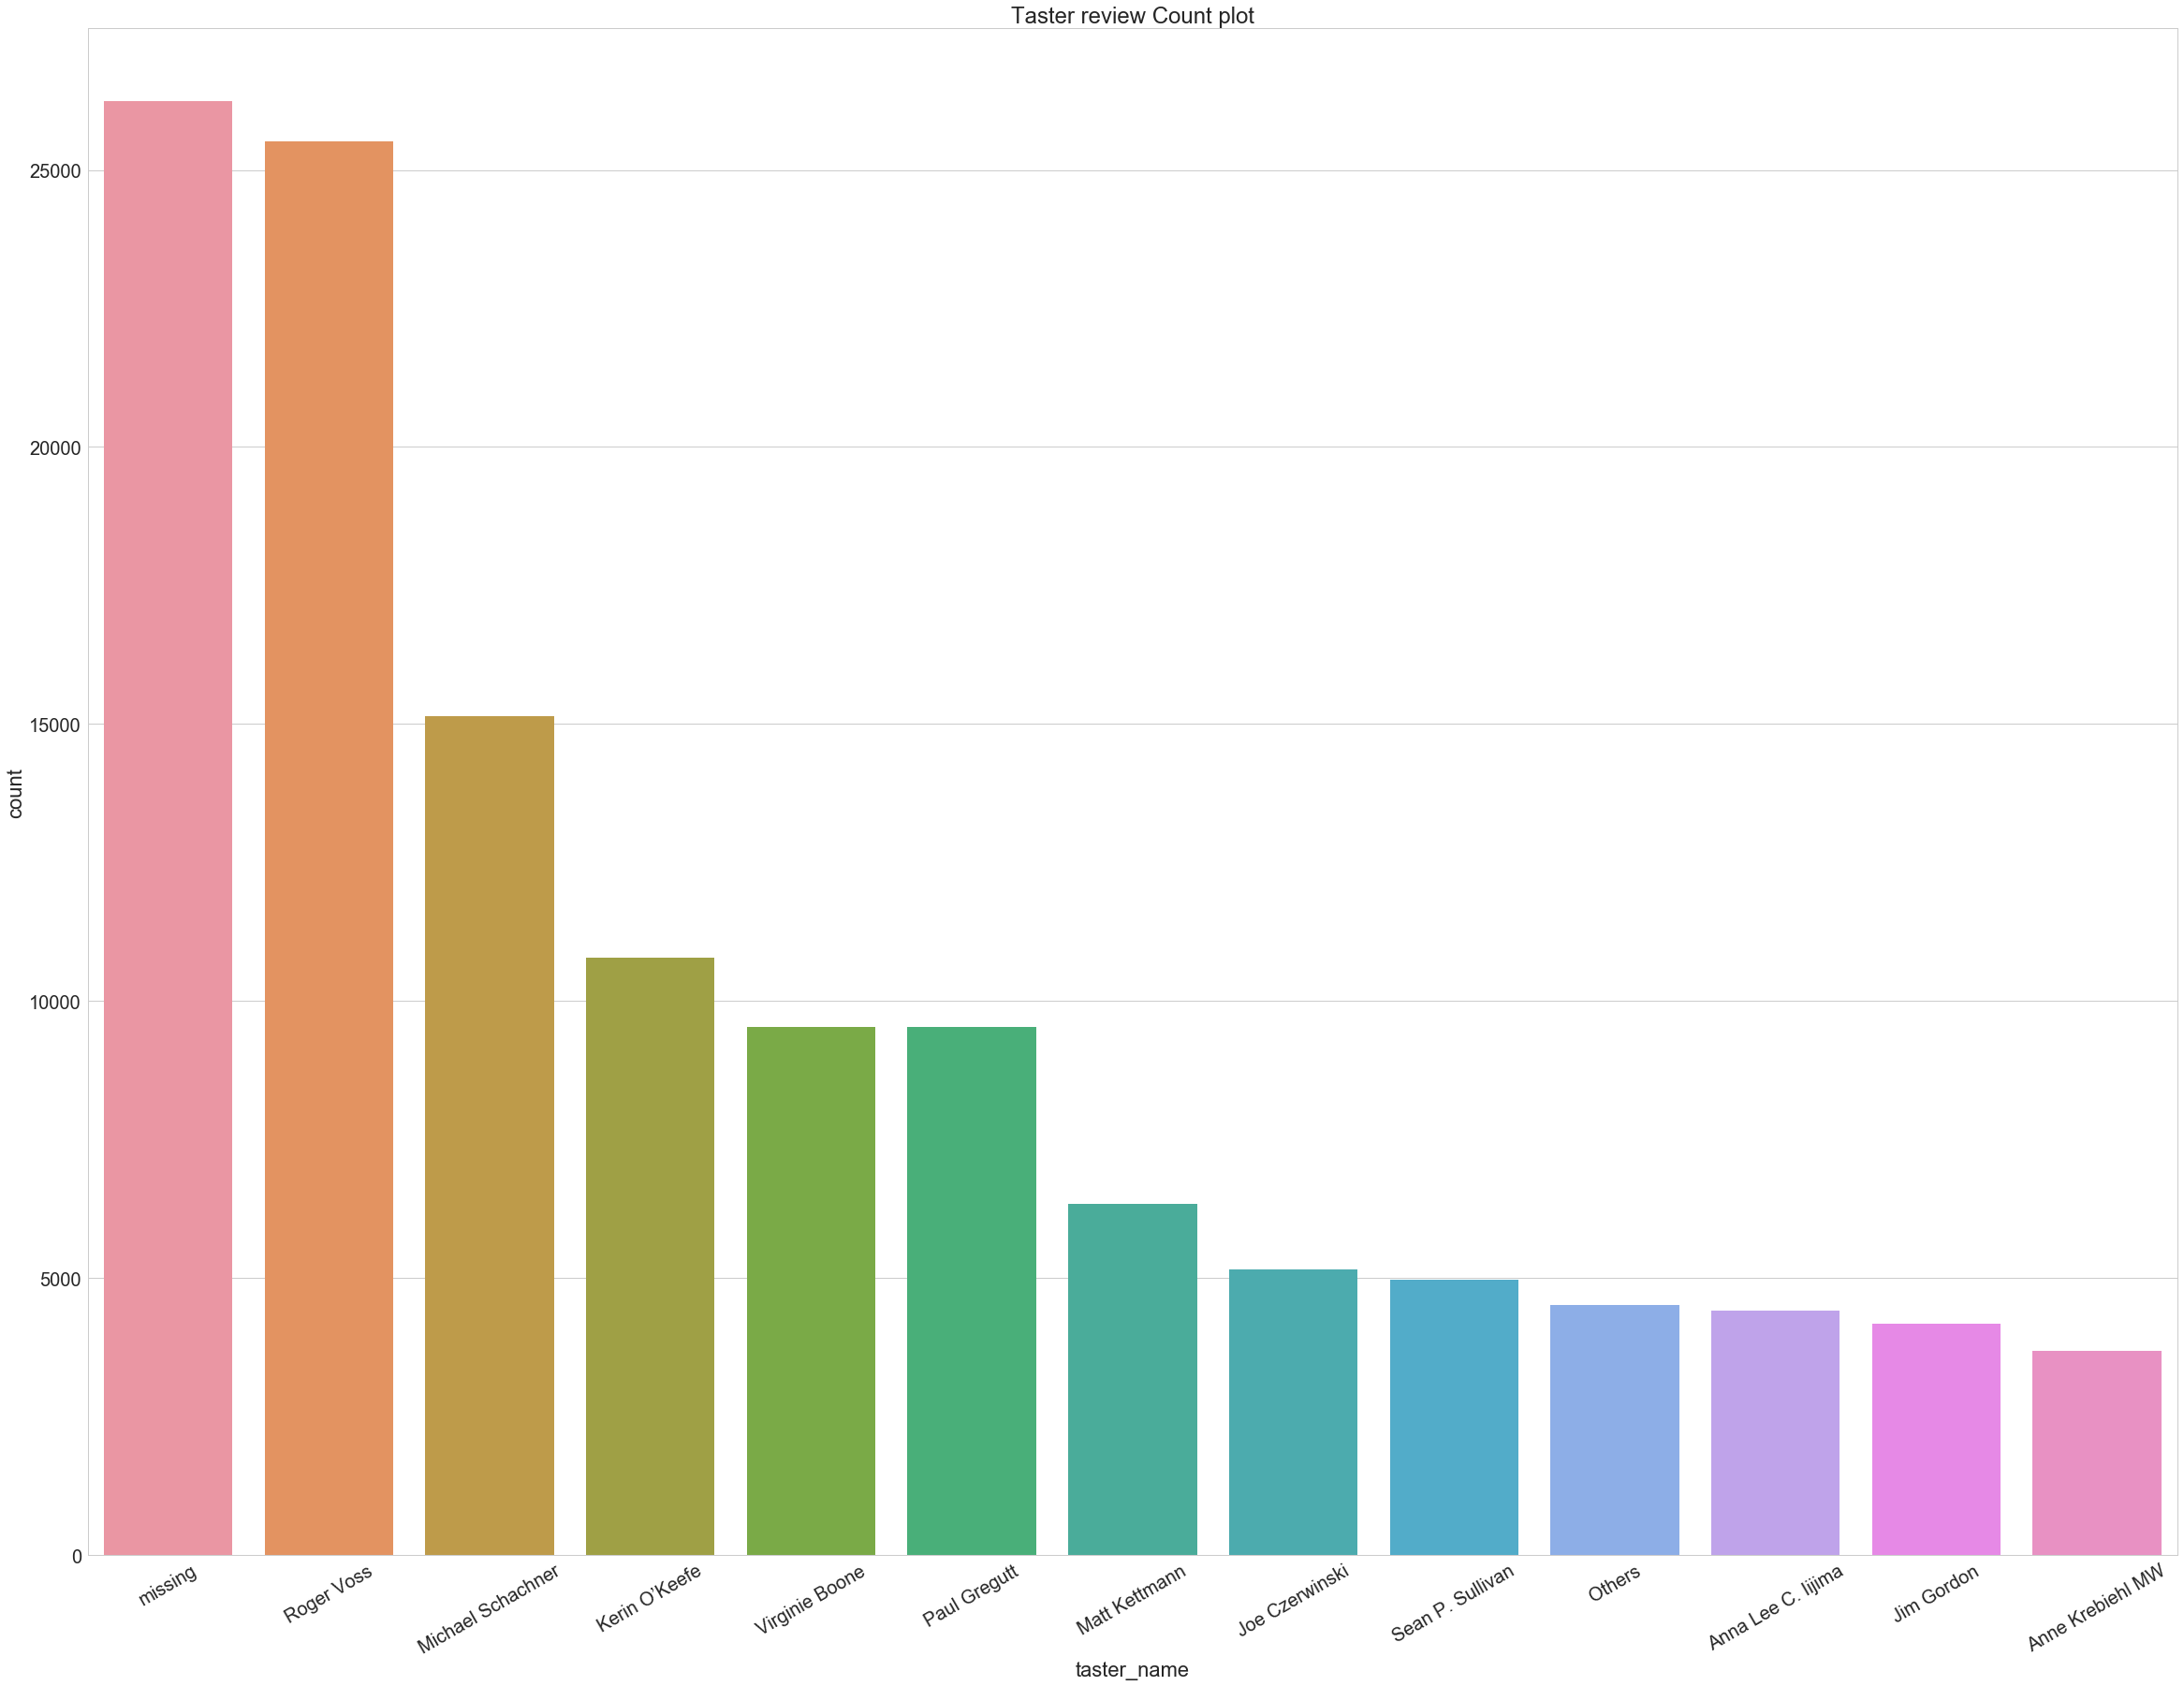

In [20]:
# post adjustment graph 
g = sns.countplot(data=wine_reviews_raw,
                  x='taster_name',
                  order=wine_reviews_raw.taster_name.value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Taster review Count plot')
plt.show()

In [21]:
# drop unnecessary columns province, region_1, region_2, taster_twitter_handle, title, variety and winery.
wine_reviews_raw = wine_reviews_raw.drop(columns=['province','region_1', 'region_2', 'taster_twitter_handle', 'title','variety', 'winery','price'], axis=1)

# hot encoding for country and taster name as they are limited categories. 
wine_reviews_raw_encoded =  pd.get_dummies(wine_reviews_raw, columns=['country','taster_name'])

In [22]:
# https://medium.com/@adi_enasoaie/easy-lsi-pipeline-using-scikit-learn-a073f2484408
#source: https://www2.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.pipeline import Pipeline

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

stemmer = PorterStemmer()
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words='english', 
                             use_idf=True, 
                             smooth_idf=True,
                             norm ='l1',
                             min_df=0.02) # 0.02: returns 261 features. 

# convert descriptions to array.
reviews_desc = wine_reviews_raw_encoded.description.tolist()

# create pipeline
trans_pipeline = Pipeline([('tfidf', vectorizer)])

# transfrom text into a matrix values.
desc_matrix = trans_pipeline.fit_transform(reviews_desc)

# dataframe with matrix 
desc_tok_ary = pd.DataFrame(desc_matrix.toarray(), columns=vectorizer.get_feature_names())

In [23]:
# https://stackoverflow.com/questions/45961747/append-tfidf-to-pandas-dataframe?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
# contact data cleaned in earlier steps with tokenized description data.
wine_reviews_raw_encoded_tok_desc = pd.concat([wine_reviews_raw_encoded,desc_tok_ary],axis=1)

In [24]:
# Term-frequency to represent textual information in the vector space. 
# However, the main problem with the term-frequency approach is that it scales up frequent terms and scales down rare terms which are empirically more informative than the high frequency terms. 
# The basic intuition is that a term that occurs frequently in many documents is not a good discriminator
#source: http://blog.christianperone.com/2011/10/machine-learning-text-feature-extraction-tf-idf-part-ii/

from sklearn.model_selection import train_test_split

# extract points column from final data frame.
y = wine_reviews_raw_encoded_tok_desc.points

# drop points column to run ML algo. on predictors.
X = wine_reviews_raw_encoded_tok_desc.drop(['points','description','designation'], axis=1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

In [76]:
X.count()

count_winery                      129971
country_Argentina                 129971
country_Australia                 129971
country_Austria                   129971
country_Chile                     129971
country_France                    129971
country_Germany                   129971
country_Italy                     129971
country_Others                    129971
country_Portugal                  129971
country_Spain                     129971
country_US                        129971
taster_name_Anna Lee C. Iijima    129971
taster_name_Anne Krebiehl MW      129971
taster_name_Jim Gordon            129971
taster_name_Joe Czerwinski        129971
taster_name_Kerin O’Keefe         129971
taster_name_Matt Kettmann         129971
taster_name_Michael Schachner     129971
taster_name_Others                129971
taster_name_Paul Gregutt          129971
taster_name_Roger Voss            129971
taster_name_Sean P. Sullivan      129971
taster_name_Virginie Boone        129971
taster_name_miss

In [25]:
#X_train.columns
#X_test = y_test = ''
# https://stackoverflow.com/questions/45961747/append-tfidf-to-pandas-dataframe?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
# contact data cleaned in earlier steps with tokenized description data.
wine_reviews_raw_encoded_tok_desc = pd.concat([wine_reviews_raw_encoded,desc_tok_ary],axis=1)

# extract points column from final data frame.
y = wine_reviews_raw_encoded_tok_desc.points

# drop points column to run ML algo. on predictors.
X = wine_reviews_raw_encoded_tok_desc.drop(['points','description','designation'], axis=1)
#Note: need to check with Lucas on work around missing values on PRICE.

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# create feature union
steps = []

# perform PCA, then select 50 best and then apply boasting algo.
steps.append(('pca', PCA()))
steps.append(('select_best', SelectKBest(k=50)))
steps.append(('gradientboostingregressor', GradientBoostingRegressor()))

# build pipeline  
model = Pipeline(memory=None,steps = steps)

# grid search to find best parameters for estimater.
parameters = {
    'pca__n_components': [70] ,
    'gradientboostingregressor__learning_rate' : [0.1],
    'gradientboostingregressor__n_estimators' : [120,130,150] ,
    'gradientboostingregressor__max_depth' : [6,8,10,15]
}

# create grid search object with necessary config.
grid = GridSearchCV(model, cv=2, n_jobs=1, param_grid=parameters)
# start grid search
grid.fit(X_train,y_train)

In [ ]:
# out of all different configurations, see the best estimater for best CV score.
grid.best_estimator_
grid.best_score_

In [89]:
# score given by algo. 
feature_imp_algo = grid.best_estimator_.steps[2][1].feature_importances_ 

feature_names = X_train.columns
mask = x.best_estimator_.steps[0][1].get_support() 

new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

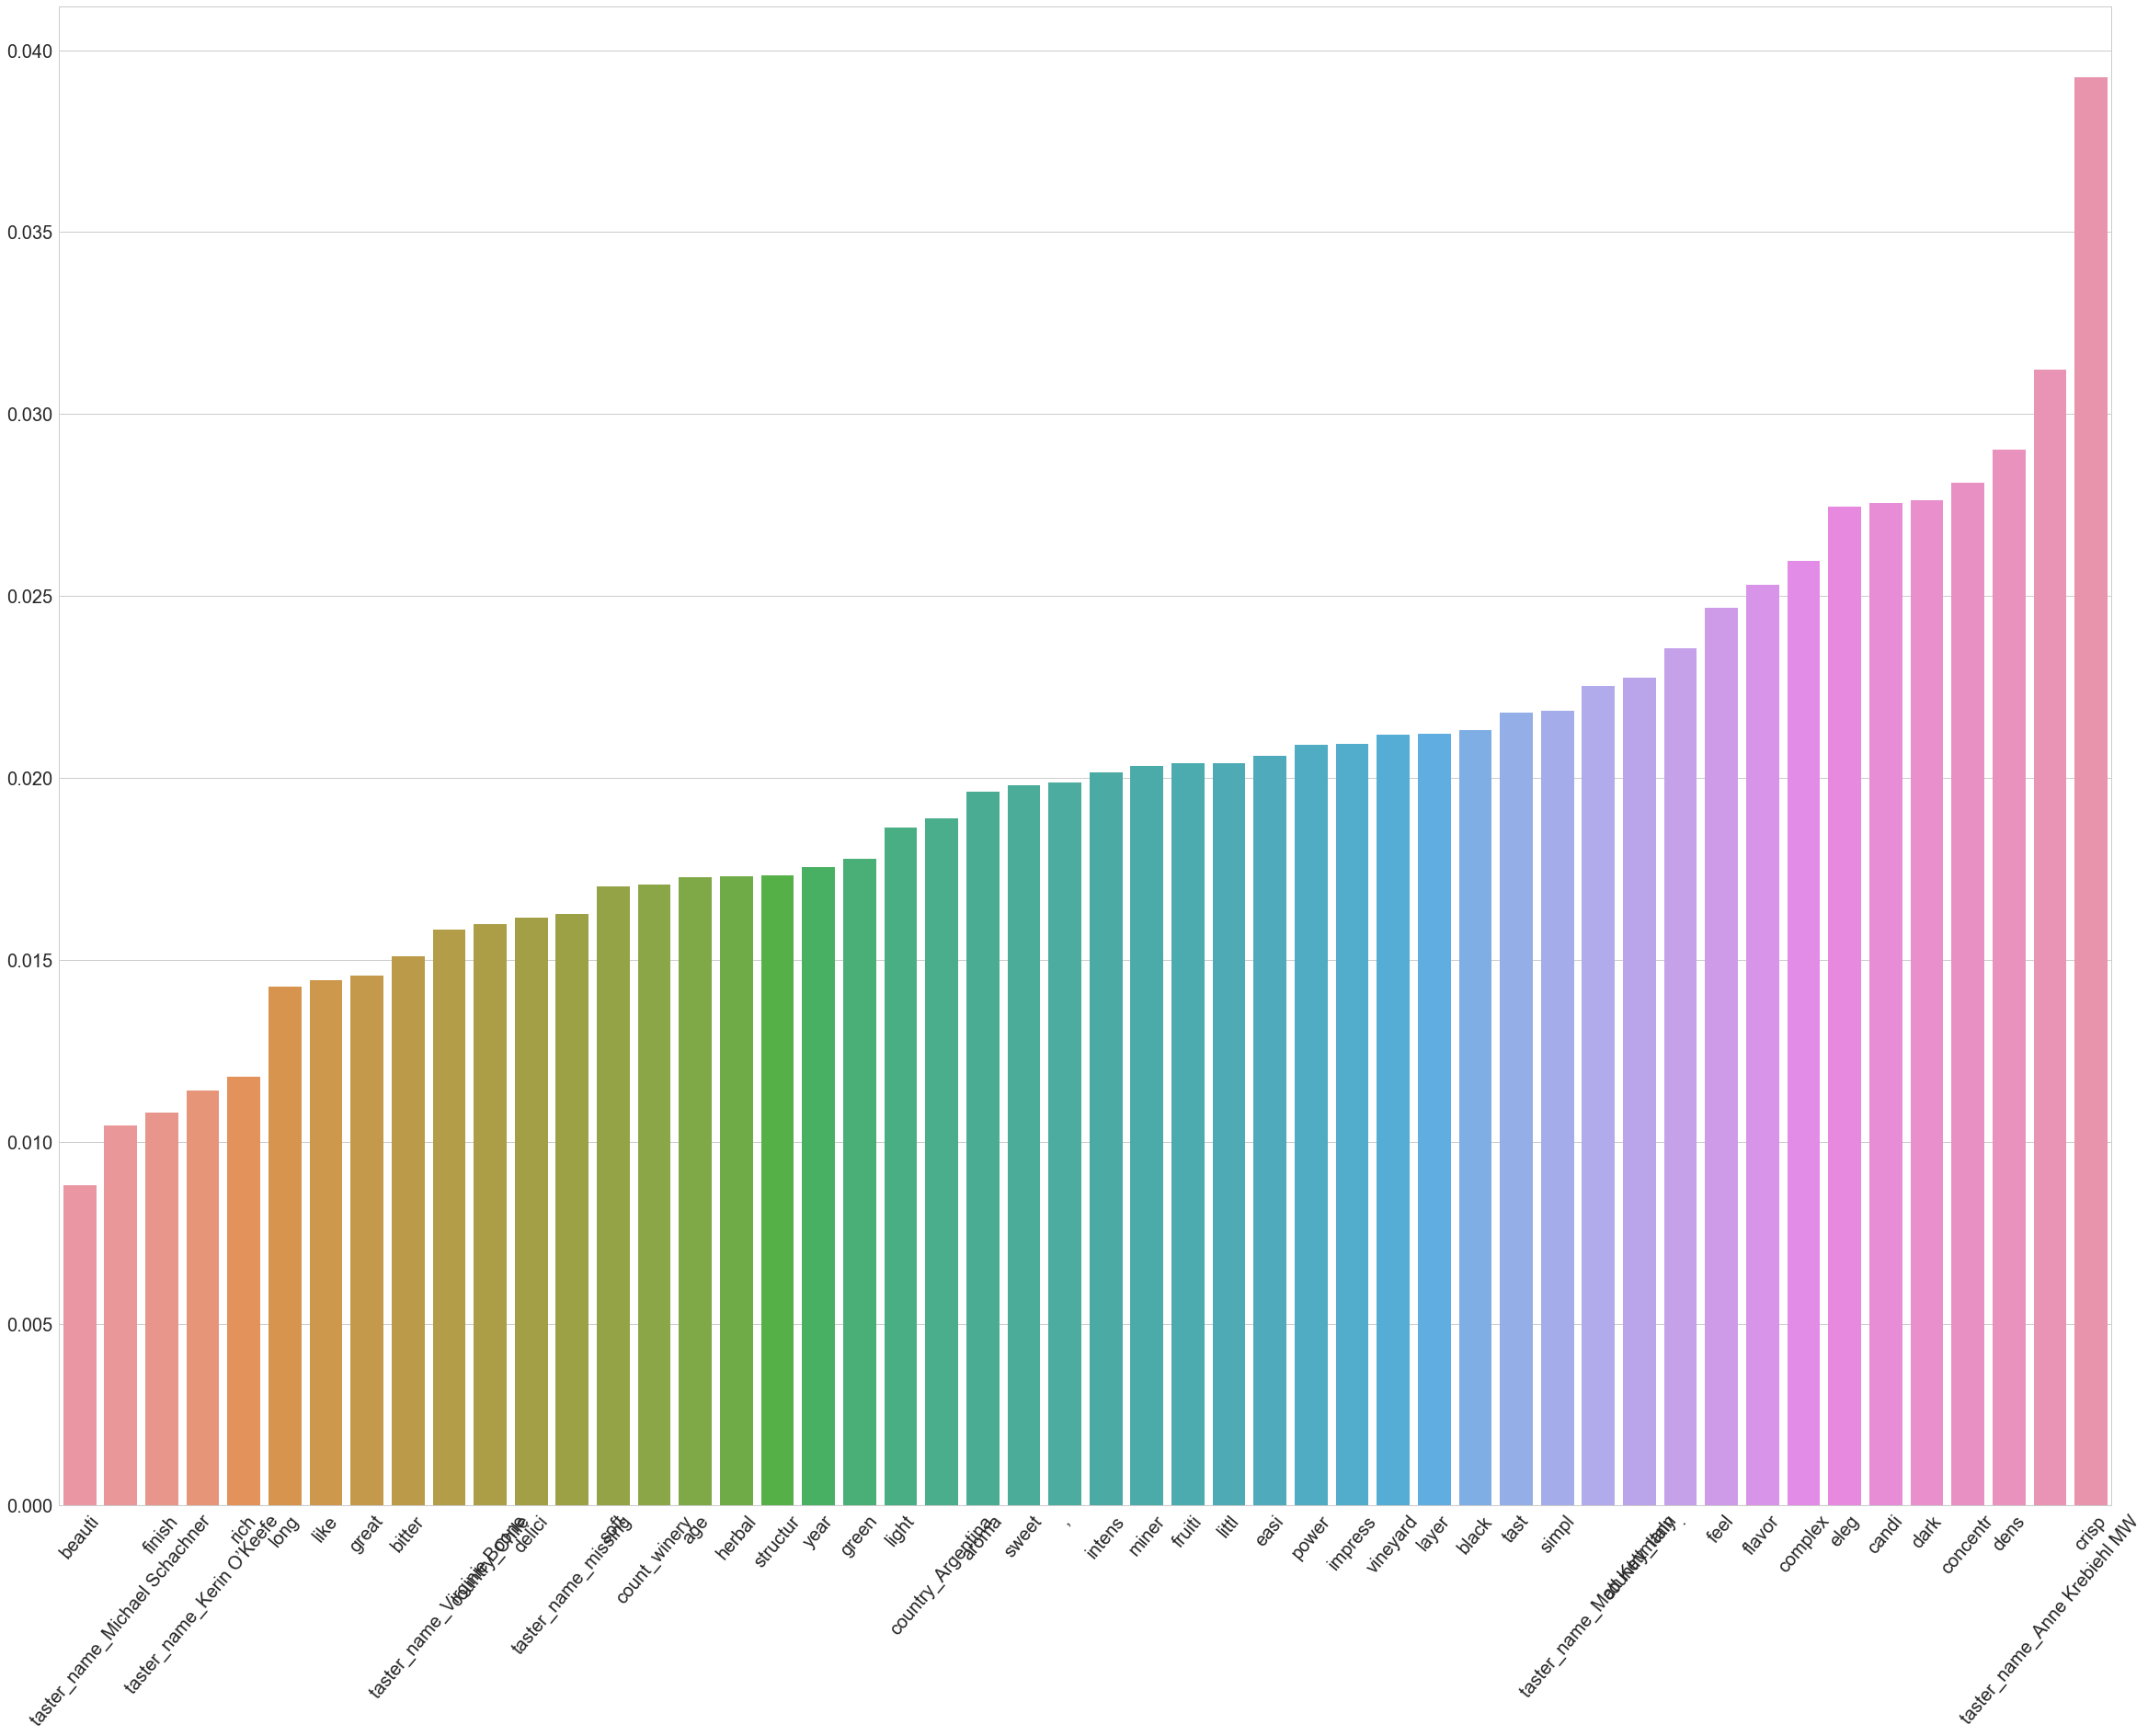

In [178]:
ziplist = zip(feature_imp_algo,new_features)
ziplist = sorted(ziplist)

name_imp = [y for (_,y) in ziplist]
imp_score = [x for (x,_) in ziplist]


g = sns.barplot(name_imp,imp_score)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.title('')
plt.show()


In [ ]:
# There are sone words that have positive effect are crisp, dense, dark, candi, eleg, comlex, flavour, feel .. etc.